## <u><b>시계열 데이터 예측하기 - 데이터 생성 및 평균값 활용 예측
<b> 참고: https://bit.ly/3wJh6YG
> <b> 시계열 데이터 만들기 <br/>
    Naive Forecast <br/>
    지난 30개 평균값으로 예측하기 <br/>

### <b>시계열 데이터 만들기

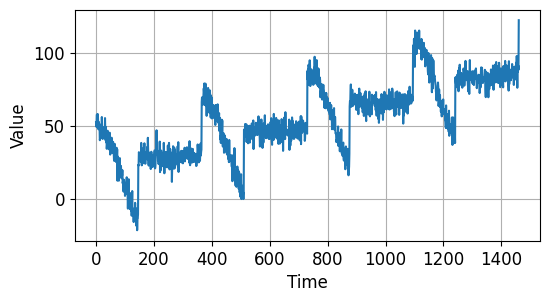

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12


def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi), 1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

plot_series(time, series)
plt.show()

시계열 데이터의 앞부분 1000개를 훈련용, 그리고 나머지를 검증용 데이터로 아래와 같이 분리

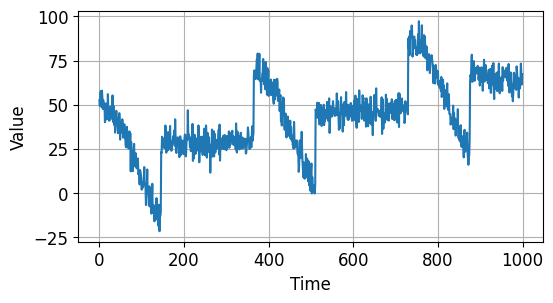

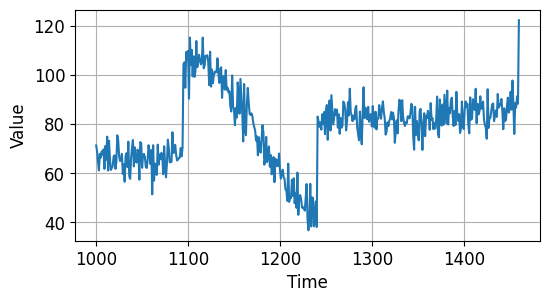

In [2]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

plot_series(time_train, x_train)
plt.show()

plot_series(time_valid, x_valid)
plt.show()

### <b> Navie Forecast
<b>naive_forecast</b> 는 말 그대로 이전의 데이터를 다음 값으로 예측하는 시계열 데이터이다.<br/>
아래 그래프는 한 스탭 앞의 데이터를 가져와서 나타낸 것이다.

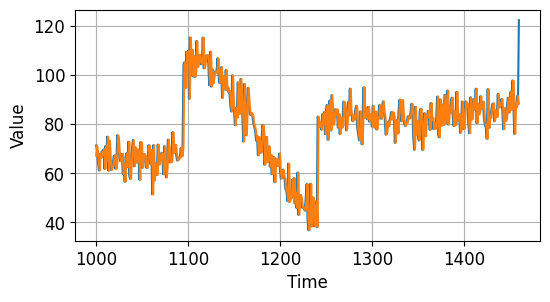

In [3]:
naive_forecast = series[split_time - 1: -1]
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

그래프 플롯의 시작 시점을 한 스탭 뒤로 하면 아래와 같다. 

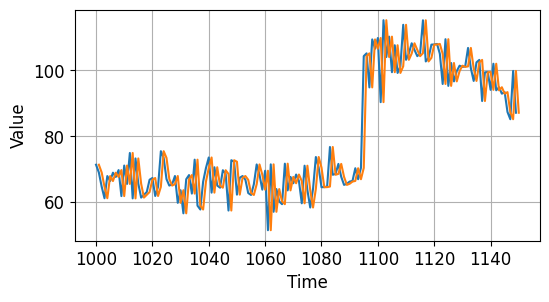

In [4]:
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

<b>keras.metrics</b> 모듈의 `mean_squared_error()`, `mean_absolute_error()` 함수는 두 시계열 데이터 간의 오차를 정량화한다.

In [6]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827534
5.937909


### <b> 지난 30개의 평균값으로 예측하기
`moving_average_forecast()` 함수는 <b>window_size</b> 동안의 평균 값을 다음 예측 값으로 사용한다.

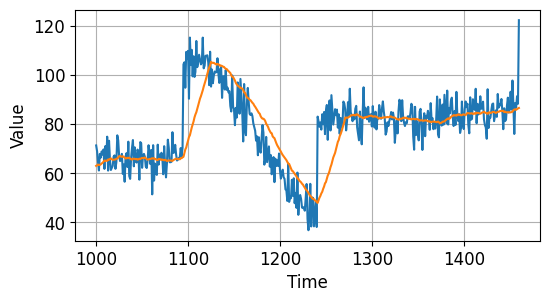

In [7]:
def moving_average_forecast(series, window_size):
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time: time + window_size].mean())
    return np.array(forecast)

moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

`mean_squared_error()`, `mean_absolute_error()` 함수로 예측의 오차를 확인

In [8]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

106.674576
7.142419
